<a href="https://colab.research.google.com/github/ShravaniAnilPatil/Codes/blob/main/laptop%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the CSV file
from google.colab import files
import pandas as pd

uploaded = files.upload()
print("reached")



df = pd.read_csv(list(uploaded.keys())[0])

print(df.head())
new_df = df[['Operating System','Processor Brand','Processor Name','RAM','RAM Type','SSD','SSD Capacity','Screen Resolution','Screen Size','Storage Type','Touchscreen','Type','Brand','Price']]
new_df["Brand"] = new_df["Brand"].str.split().str[0]


# Save the new dataset to a CSV file (optional)
new_df.to_csv("new_dataset.csv", index=False)
new_df.dropna(inplace=True)
import pandas as pd
import re

# Function to extract inches from the screen size column
def extract_inches(screen_size):
    match = re.search(r"(\d+\.?\d*)\s*Inch", screen_size, re.IGNORECASE)
    return float(match.group(1)) if match else None  # Convert to float

# Apply extraction function
new_df["Screen Size"] = new_df["Screen Size"].apply(extract_inches)

# Check extracted values
# print(new_df["Screen Size"].head())
import pandas as pd
import re

# Function to extract width and height from resolution
def extract_resolution(resolution):
    match = re.search(r"(\d+)\D+(\d+)", resolution)  # Extract first two numbers
    if match:
        return int(match.group(1)), int(match.group(2))  # Width, Height
    else:
        return None, None

# Apply extraction
new_df[["Resolution_Width", "Resolution_Height"]] = new_df["Screen Resolution"].apply(
    lambda x: pd.Series(extract_resolution(str(x)))
)

# Check extracted values
# print(new_df[["Resolution_Width", "Resolution_Height"]].head())
# Compute total pixel count
new_df["Total_Pixels"] = new_df["Resolution_Width"] * new_df["Resolution_Height"]

# Compute aspect ratio
new_df["Aspect_Ratio"] = new_df["Resolution_Width"] / new_df["Resolution_Height"]
new_df.drop(columns=["Screen Resolution"], inplace=True)
# Check new features
# print(new_df[["Resolution_Width", "Resolution_Height", "Total_Pixels", "Aspect_Ratio"]].head())
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {
    'SSD Capacity': ['128 GB','256 GB', '512 GB', '1 TB']
}



# Initialize the label encoder
le = LabelEncoder()

# Apply Label Encoding to 'SSD Capacity' column
new_df['SSD Capacity'] = le.fit_transform(new_df['SSD Capacity'])

# Display the updated DataFrame

# new_df.head()
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {
    'RAM Type': ['Unified Memory', 'LPDDR4X', 'DDR4', 'LPDDR5X', 'DDR5', 'LPDDR5', 'LPDDR4']
}

# Convert to DataFrame


# Initialize the label encoder
le = LabelEncoder()

# Apply Label Encoding to 'RAM Type' column
new_df['RAM Type'] = le.fit_transform(new_df['RAM Type'])

# Display the updated DataFrame
# print(new_df)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

ram_order = ['4 GB', '8 GB', '12 GB', '16 GB', '24 GB', '32 GB', '36 GB', '48 GB']
new_df['RAM'] = pd.Categorical(new_df['RAM'], categories=ram_order, ordered=True)
new_df['RAM'] = new_df['RAM'].cat.codes
# new_df.head()
new_df['RAM'].unique()
import pandas as pd

# Create a list of columns to apply one-hot encoding (excluding 'Price')
columns = list(new_df.columns)  # Convert Index to a list
 # Remove "Price" from the list
columns.remove("Price")
columns.remove("RAM")
columns.remove("RAM Type")
columns.remove("SSD Capacity")
# columns.remove("Weight")
columns.remove("Screen Size")
# columns.remove("Dedicated Graphic Memory Capacity")
columns.remove("Resolution_Width")
columns.remove("Resolution_Height")
columns.remove("Total_Pixels")
columns.remove("Aspect_Ratio")
# Apply One-Hot Encoding using pd.get_dummies
new_df = pd.get_dummies(new_df, columns=columns)

# Display the updated dataset with one-hot encoded values
# print(new_df.head())

# Save the encoded dataset (optional)
# new_df.to_csv("encoded_dataset.csv", index=False)
new_df['Price'] = new_df['Price'].str.replace('₹', '', regex=False)
new_df['Price'] = new_df['Price'].str.replace(',', '')
new_df["Price"]=new_df["Price"].astype('int64')
new_df["Price"]
import numpy as np

new_df["Price"] = np.log1p(new_df["Price"])  # Reduce impact of large values
import numpy as np
X=new_df.drop(columns=['Price'])
Y=(new_df['Price'])
#Y
new_df.to_csv("encoded_dataset.csv", index=False)
from google.colab import files

# Download the file
files.download("encoded_dataset.csv")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# pip install xgboost
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.svm import SVR
# from xgboost import XGBRegressor
import pandas as pd

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
}

# Assuming X_train, X_test, y_train, y_test are already defined

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X_train.select_dtypes(include=['float64', 'int64']).columns),
        # Add any other preprocessing steps (like OneHotEncoder) for categorical variables
    ],
    remainder='passthrough'
)

# Iterate through models and evaluate performance
for name, model in models.items():
    # Create a pipeline with imputation and the model
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name}:")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print("-" * 50)

Saving new_dataset.csv to new_dataset (5).csv
reached
  Operating System Processor Brand     Processor Name    RAM        RAM Type  \
0    macOS Sequoia           Apple                 M2  16 GB  Unified Memory   
1  Windows 11 Home             AMD  Ryzen 7 Octa Core  16 GB         LPDDR4X   
2  Windows 11 Home           Intel            Core i5   8 GB            DDR4   
3  Windows 11 Home           Intel            Core i5  16 GB         LPDDR5X   
4         Prime OS        MediaTek    MediaTek MT8788   4 GB          LPDDR4   

   SSD SSD Capacity   Screen Resolution           Screen Size Storage Type  \
0  Yes       256 GB   2560 x 1664 Pixel  34.54 cm (13.6 Inch)          SSD   
1  Yes       512 GB   1920 x 1200 Pixel    35.56 cm (14 Inch)          SSD   
2  Yes       512 GB  1920 x 1080 Pixels  39.62 cm (15.6 inch)          SSD   
3  Yes       512 GB   1920 x 1200 Pixel    35.56 cm (14 Inch)          SSD   
4   No          NaN   1366 x 768 Pixels  29.46 cm (11.6 Inch)         eMMC 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Linear Regression:
R2 Score: 0.9062
Mean Absolute Error: 0.1082
--------------------------------------------------


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

uploaded = files.upload()
print("reached")



data = pd.read_csv(list(uploaded.keys())[0])


# Preprocessing
# Dropping irrelevant columns (modify as needed)
data = data.drop(['Total_Pixels'], axis=1)  # Example column, modify as required

# Encoding categorical features
label_encoder = LabelEncoder()
data['Brand'] = label_encoder.fit_transform(data['Brand_ASUS'])  # Modify for other brands

# Selecting features and target variable
X = data.drop('Price', axis=1)  # Modify the target variable as needed
y = data['Price']  # You may need to bin this if classification is needed

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifiers
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

# nb = GaussianNB()
# nb.fit(X_train, y_train)

# Predicting new data
new_data = np.array([[8, 2, 512, 15.6, 1920, 1080, 1, 0, 1]])  # Example features
print("Using Decision Tree:")
print(dtr.predict(new_data))

# print("Using Naïve Bayes:")
# print(nb.predict(new_data))

# Predicting on the test set
y_pred_dtc = dtr.predict(X_test)
# y_pred_nb = nb.predict(X_test)

# Evaluating classifiers
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print('Decision Tree Confusion Matrix:\n', cm_dtc)
print('Decision Tree Accuracy:', accuracy_dtc)

# cm_nb = confusion_matrix(y_test, y_pred_nb)
# accuracy_nb = accuracy_score(y_test, y_pred_nb)
# print('Naïve Bayes Confusion Matrix:\n', cm_nb)
# print('Naïve Bayes Accuracy:', accuracy_nb)

# Visualizing Training Data
plt.scatter(X_train['RAM'], y_train, c="blue")
plt.xlabel("RAM")
plt.ylabel("Price")
plt.title("RAM vs Price")
plt.show()

Saving encoded_dataset.csv to encoded_dataset (8).csv
reached


ValueError: continuous is not supported

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from google.colab import files

# Upload file
uploaded = files.upload()
print("File uploaded successfully.")

# Load dataset
data = pd.read_csv(list(uploaded.keys())[0])

# Drop irrelevant columns
if 'Total_Pixels' in data.columns:
    data = data.drop(['Total_Pixels'], axis=1)

# Encoding categorical features
label_encoder = LabelEncoder()
if 'Brand' in data.columns:
    data['Brand'] = label_encoder.fit_transform(data['Brand'])

# Define features and target
X = data.drop('Price', axis=1)  # Modify as needed
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

# # Ensure new data matches feature count
# new_data = np.array([[8, 2, 512, 15.6, 1920, 1080, 1, 0, 1]])  # Example features
# if new_data.shape[1] != X_train.shape[1]:
#     raise ValueError("Feature mismatch: new_data should have {} features".format(X_train.shape[1]))


print("Using Decision Tree:")
print(dtr.predict(new_data))


y_pred_dtr = dtr.predict(X_test)


mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("Decision Tree Mean Squared Error:", mse_dtr)


plt.scatter(X_train['RAM'], y_train, c="blue")
plt.xlabel("RAM")
plt.ylabel("Price")
plt.title("RAM vs Price")
plt.show()


Saving encoded_dataset.csv to encoded_dataset (10).csv
File uploaded successfully.
Using Decision Tree:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but DecisionTreeRegressor is expecting 90 features as input.

Saving encoded_dataset.csv to encoded_dataset (15).csv
File uploaded successfully.

Model Evaluation:
Mean Squared Error (MSE): 0.04122949056582392
Mean Absolute Error (MAE): 0.11143007139998795
R² Score: 0.846670510139803


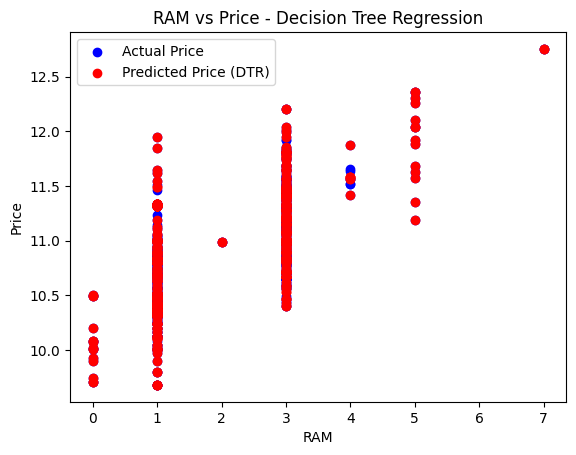

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import files


uploaded = files.upload()
print("File uploaded successfully.")


data = pd.read_csv(list(uploaded.keys())[0])



if 'Total_Pixels' in data.columns:
    data = data.drop(['Total_Pixels'], axis=1)


label_encoder = LabelEncoder()
if 'Brand' in data.columns:
    data['Brand'] = label_encoder.fit_transform(data['Brand'])


X = data.drop('Price', axis=1)
y = data['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)


y_pred_dtr = dtr.predict(X_test)


mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse_dtr)
print("Mean Absolute Error (MAE):", mae_dtr)
print("R² Score:", r2_dtr)

# # Predict on new data
# new_data = np.array([[8, 2, 512, 15.6, 1920, 1080, 1, 0, 1]])  # Example input features
# if new_data.shape[1] != X_train.shape[1]:
#     raise ValueError("Feature mismatch: new_data should have {} features".format(X_train.shape[1]))

# print("\nPrediction on New Data (Decision Tree Regressor):", dtr.predict(new_data))

# Visualization
plt.scatter(X_train['RAM'], y_train, c="blue", label="Actual Price")
plt.scatter(X_train['RAM'], dtr.predict(X_train), c="red", label="Predicted Price (DTR)")
plt.xlabel("RAM")
plt.ylabel("Price")
plt.title("RAM vs Price - Decision Tree Regression")
plt.legend()
plt.show()
